In [1]:
from init import *

from main_funcs import * 

from DiskMap import DiskMap

# first looks at data

In [3]:
agn = 'mrk817'
data_file = './data/mrk817.dat'

dm = DiskMap(agn)

dm.feed_lc(data_file)

print(dm)

lightcurve imported
mrk817


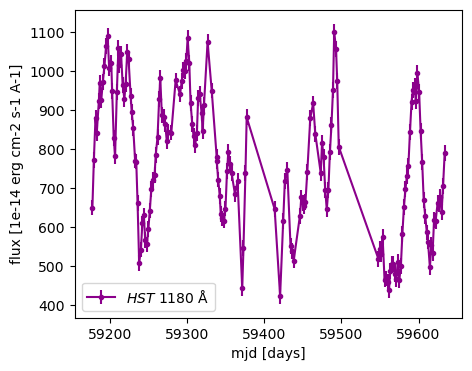

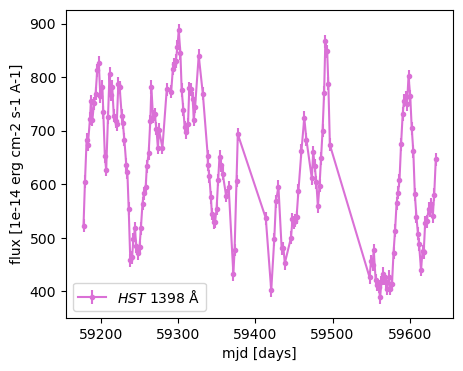

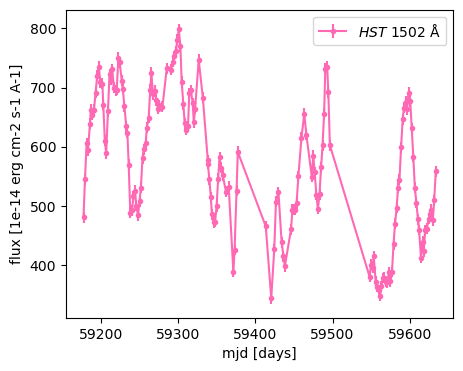

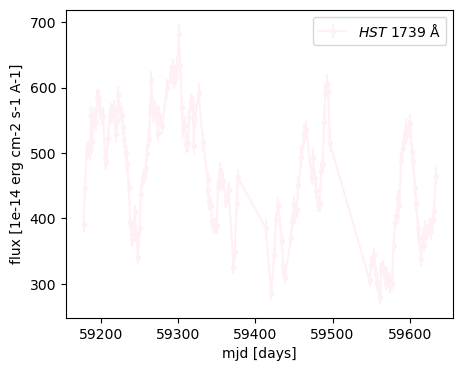

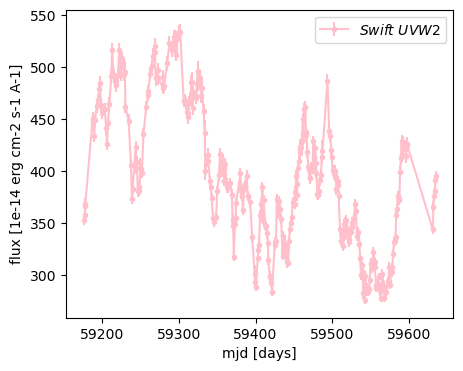

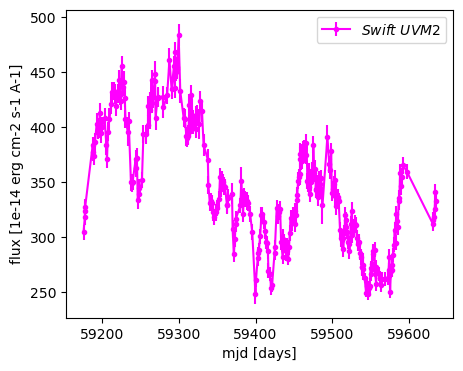

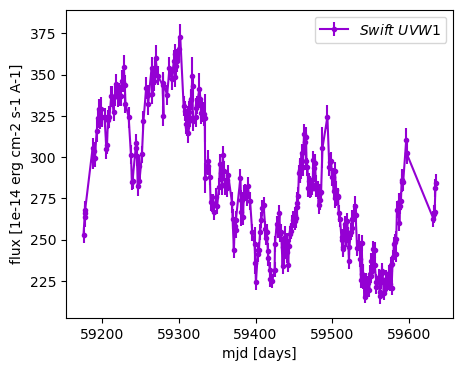

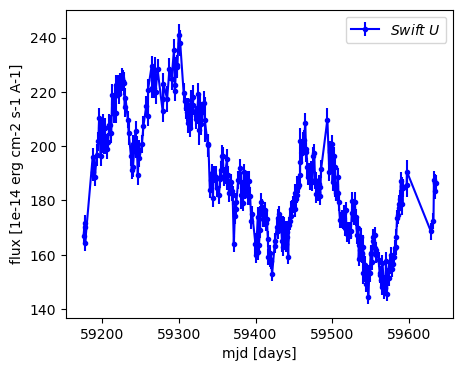

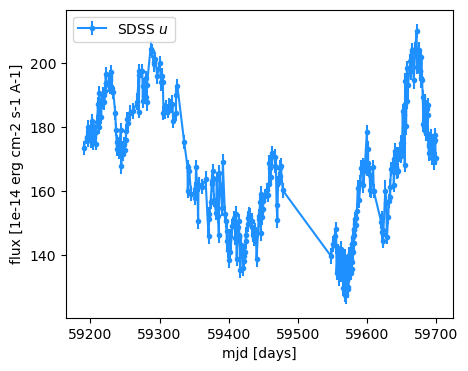

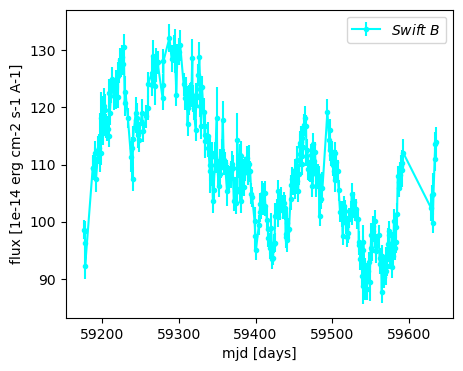

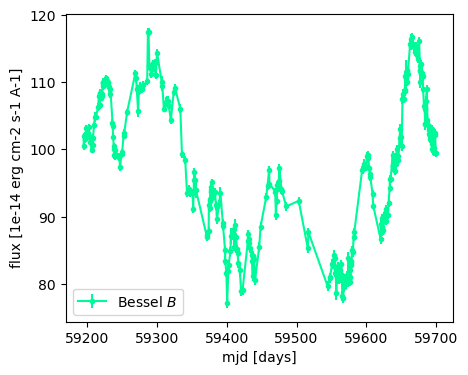

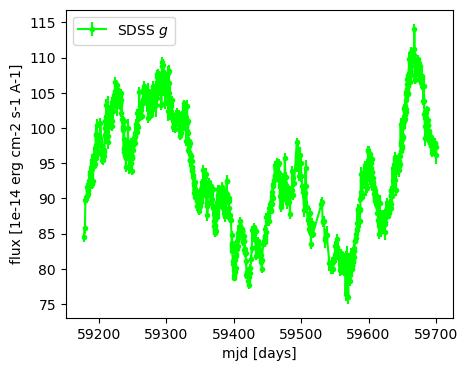

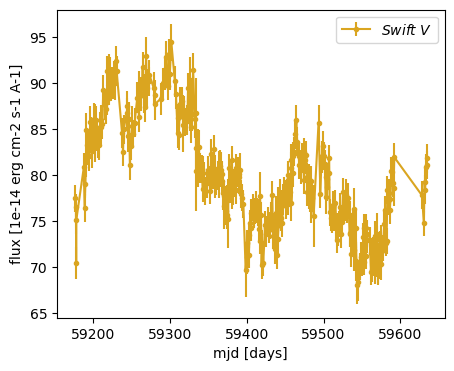

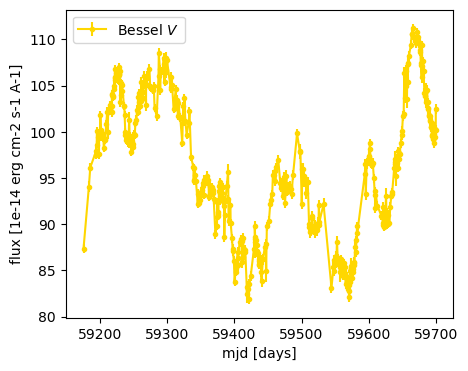

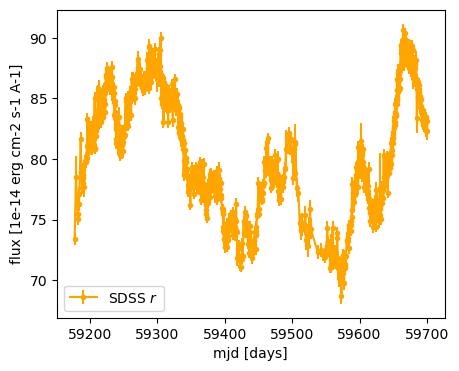

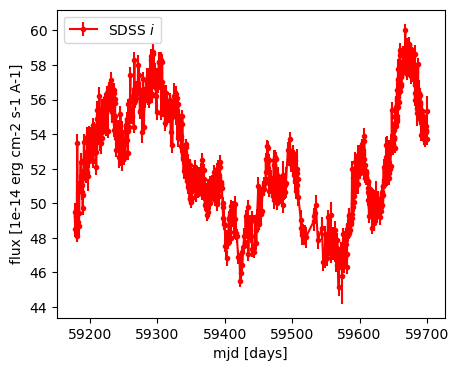

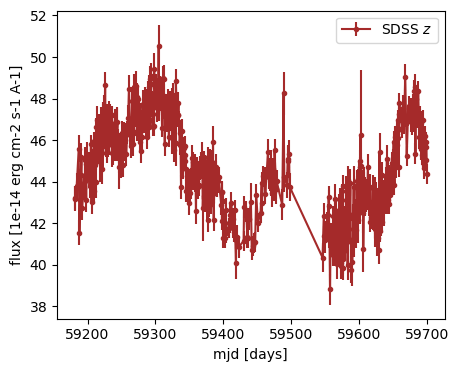

In [4]:
clrs_dict = {1180: 'darkmagenta', 1398: 'orchid', 1502: 'hotpink', 1739: 'lavenderblush',
             2030:'pink', 2589: 'darkviolet', 2228: 'fuchsia', 3494: 'blue',  3590: 'dodgerblue', 
             4329: 'cyan', 4328: 'cyan', 4360: 'mediumspringgreen', 4640: 'lime', 5402: 'goldenrod',  5401: 'goldenrod', 
             5460: 'gold', 6120: 'orange', 6410: 'orangered', 7440:'red', 7980: 'firebrick', 8897: 'brown'}

filt_dict = {1180: r'$HST$ 1180 ${\rm \AA}$', 1398: r'$HST$ 1398 ${\rm \AA}$', 1502: r'$HST$ 1502 ${\rm \AA}$', 
             1739: r'$HST$ 1739 ${\rm \AA}$',2030:r'$Swift~UVW2$', 2589: r'$Swift~UVW1$', 
             2228: r'$Swift~UVM2$',3494: r'$Swift~U$',  3590: r'SDSS $u$', 
             4329: r'$Swift~B$', 4360: r'Bessel $B$', 4640: r'SDSS $g$', 
             5402: r'$Swift~V$',  5460: r'Bessel $V$', 6120: r'SDSS $r$', 
             7440: r'SDSS $i$', 8897: r'SDSS $z$'}

for lam in dm.lams:
    index, = np.where(lam==dm.lam_ij)
    plt.figure(figsize=(5,4))
    plt.errorbar(dm.td_ij[index],
                 dm.lc_ij[index],
                 yerr=dm.err_ij[index],
                 marker='.',
                 color=clrs_dict[lam],
                 label=filt_dict[lam],
                )
    plt.xlabel('mjd [days]')
    plt.ylabel('flux [1e-14 erg cm-2 s-1 A-1]')
    plt.legend()
    plt.show()

# loading in physical & model parameters

In [5]:
redshift = 0.031455
distance = 136
mass = 0.0385
nedd = 0.14
alpha = 6
inc = 30

dm.feed_params(redshift=redshift,dist=distance,mass=mass,nedd=nedd,alpha=alpha,inc=inc)

u_space = np.logspace(0.01,3,num=50)

tp_bins = 250

tp_space = np.linspace(np.min(dm.td_ij)-0.00001,np.max(dm.td_ij)+0.00001,num=tp_bins)

dm.feed_space(tp_space=tp_space,u_space=u_space)

physical parameters defined
model parameters defined


# checking parameters

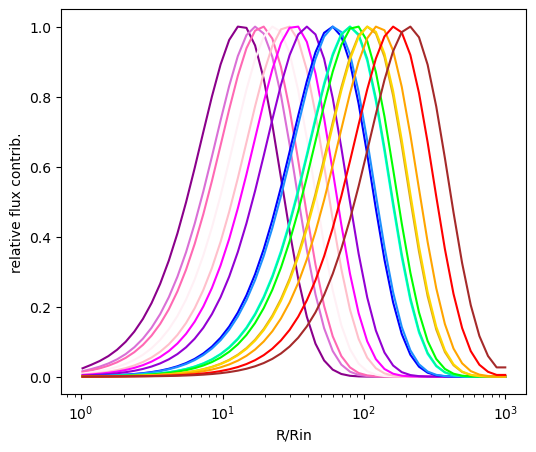

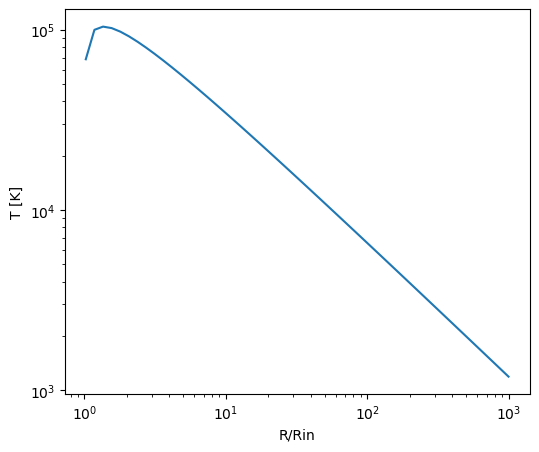

In [6]:
plt.figure(figsize=(6,5))
for lam in dm.lams:
    kernel = dm.make_kernel(lam)
    plt.plot(dm.u_space,
             kernel,
             color=clrs_dict[lam])
    plt.xscale('log')
    plt.xlabel('R/Rin')
    plt.ylabel('relative flux contrib.')
plt.show()

T_prof = dm.make_T_prof()

plt.figure(figsize=(6,5))
plt.plot(dm.u_space,
         T_prof)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/Rin')
plt.ylabel('T [K]')
plt.show()

## double check, do the filter profiles and temperature profiles look right?

## if so, 

# start running the modeling

In [9]:
xi_list = [1,10,100,1000]

pool = Pool(processes=15)

dm.do_ridge_pool(pool=pool,xi_list=xi_list)

initial matrix made
smoothing matrix made
now for some matrix inversions ... this may take a minute ...
xi = 1 done!
xi = 10 done!
xi = 100 done!
xi = 1000 done!
all done


()

# looking at model vs data lightcurves

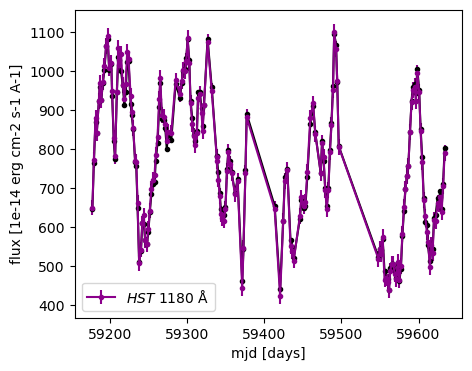

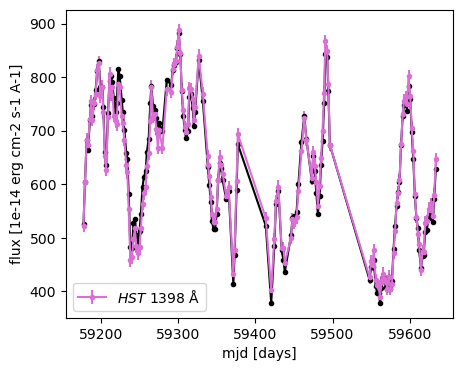

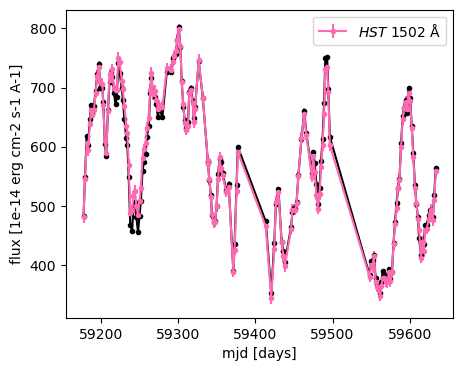

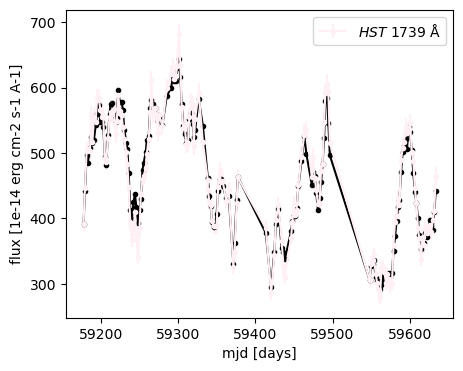

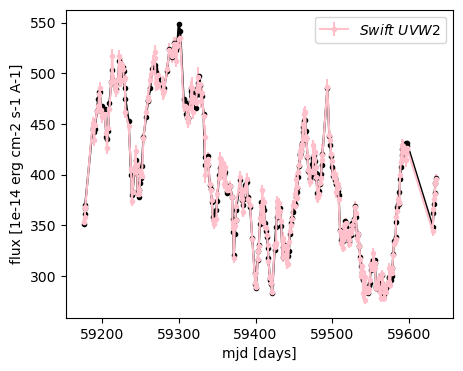

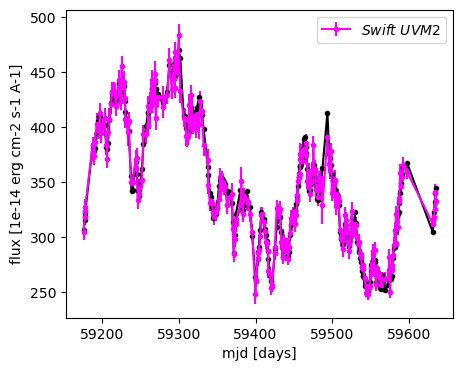

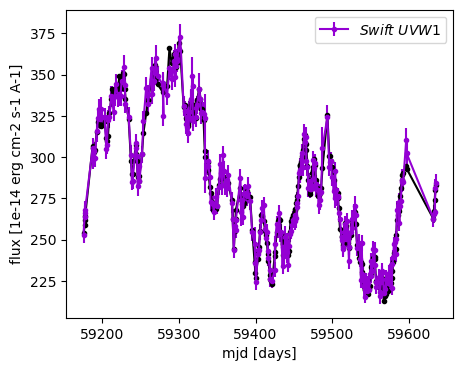

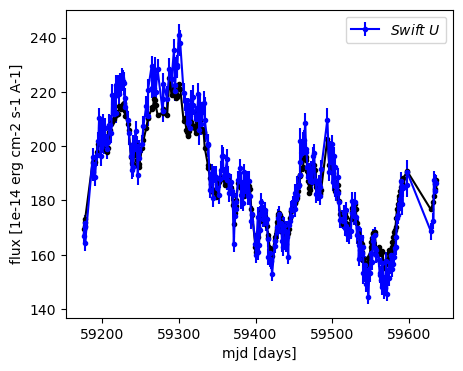

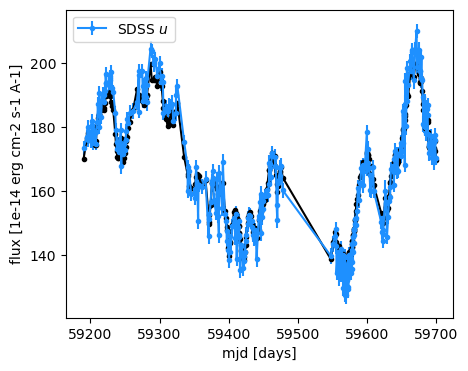

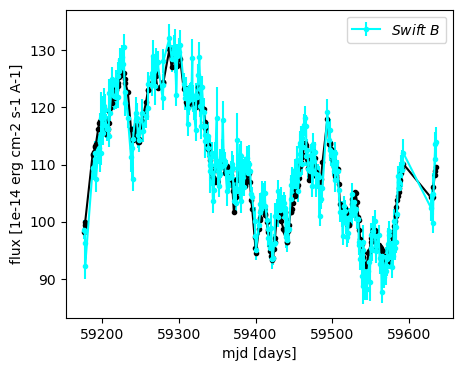

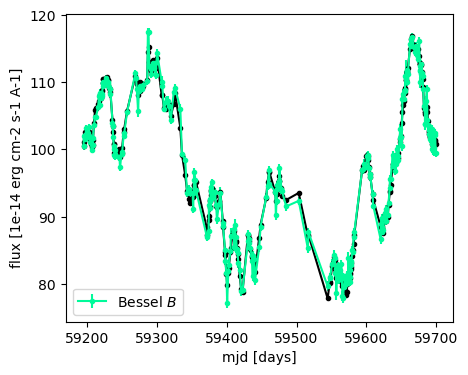

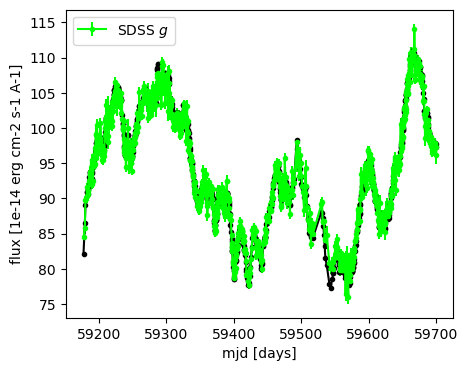

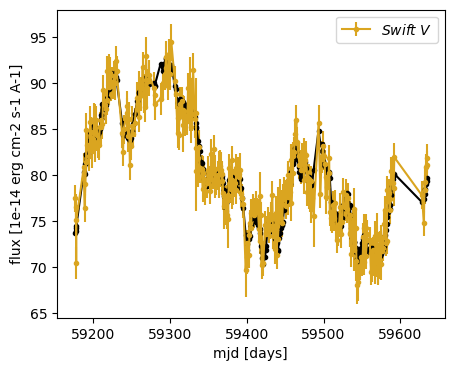

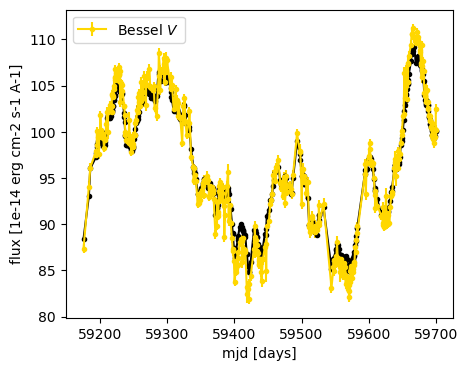

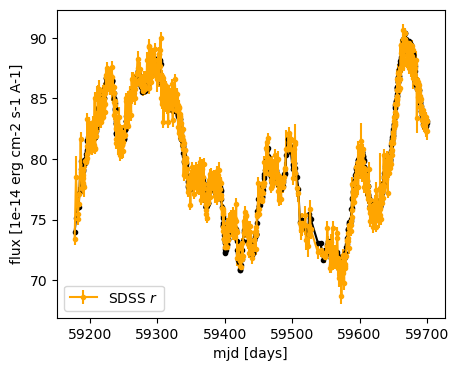

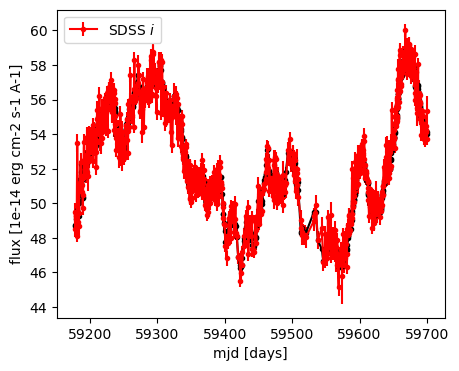

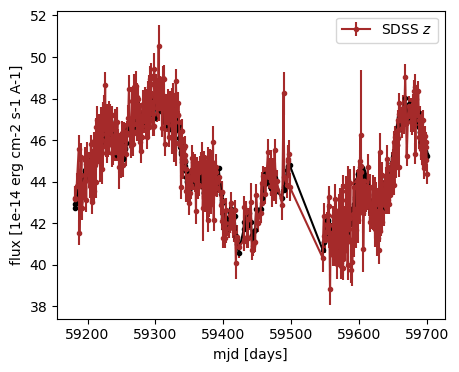

In [11]:
for lam in dm.lams:
    index, = np.where(lam==dm.lam_ij)
    plt.figure(figsize=(5,4))
    plt.errorbar(dm.td_ij[index],
                 dm.lc_ij[index],
                 yerr=dm.err_ij[index],
                 marker='.',
                 color=clrs_dict[lam],
                 label=filt_dict[lam],
                )
    plt.plot(dm.td_ij[index],
             dm.lc_pred_dict[1][index],
             marker='.',
             color='k',
            )
    plt.xlabel('mjd [days]')
    plt.ylabel('flux [1e-14 erg cm-2 s-1 A-1]')
    plt.legend()
    plt.show()